# Exercise 5: Deeper CNN Training on SVHN
Train a controlled deep convolutional neural network (CNN) on a subset of the SVHN dataset. Set random seeds to 42. Load and preprocess SVHN. Build the network using the following configuration:

- Load SVHN and normalize pixel values to [0,1]
- Use only the first 2000 training samples and first 500 test samples
- Input shape: 32 × 32 × 3
- CNN architecture:
  - Conv2D: 32 filters, 3×3 kernel, ReLU activation
  - Conv2D: 32 filters, 3×3 kernel, ReLU activation
  - MaxPooling2D: 2×2
  - Conv2D: 64 filters, 3×3 kernel, ReLU activation
  - Conv2D: 64 filters, 3×3 kernel, ReLU activation
  - MaxPooling2D: 2×2
  - Flatten
  - Dense: 256 neurons, ReLU activation
  - Dropout: 0.3
  - Output layer: 10 neurons with softmax
- Optimizer: Adam, learning rate = 0.001
- Loss: sparse categorical crossentropy
- epochs = 15, batch size = 32

Q5.1 Report the test accuracy of the deeper CNN model

First, we import the required libraries and set random seeds to 42 for reproducability.

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io

np.random.seed(42)
tf.random.set_seed(42)

We then load and unpack the Street View House Numbers (SVHN) dataset, which we will use throughut this exercise. The dataset consists of over 600,000 real-world images of house numbers from Google Street View images.

In [ ]:
# Load SVHN (format 2)
import tensorflow_datasets as tfds

(tf_train, tf_test), info = tfds.load(
    "svhn_cropped",
    split=["train[:2000]", "test[:500]"],
    as_supervised=True,
    with_info=True
)

X_train = tf.convert_to_tensor([x.numpy() / 255.0 for x, _ in tf_train])
y_train = tf.convert_to_tensor([y.numpy() for _, y in tf_train])

X_test = tf.convert_to_tensor([x.numpy() / 255.0 for x, _ in tf_test])
y_test = tf.convert_to_tensor([y.numpy() for _, y in tf_test])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.03CGWC_3.1.0/svhn_cropped-train.tfrecord*...:   0%…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.03CGWC_3.1.0/svhn_cropped-test.tfrecord*...:   0%|…

Generating extra examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.03CGWC_3.1.0/svhn_cropped-extra.tfrecord*...:   0%…

Dataset svhn_cropped downloaded and prepared to /root/tensorflow_datasets/svhn_cropped/3.1.0. Subsequent calls will reuse this data.


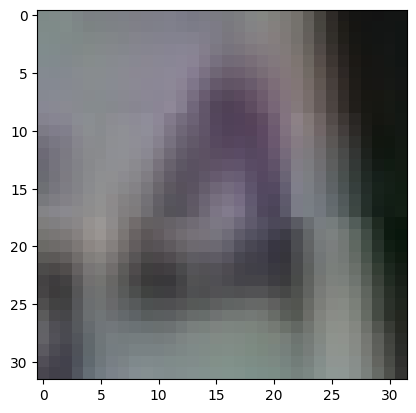

In [ ]:
# Plot an instance
plt.imshow(X_train[0])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,350,912 (12.78 MB)

 Trainable params: 1,116,970 (4.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,233,942 (8.52 MB)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 188ms/step - accuracy: 0.1857 - loss: 2.2659 - val_accuracy: 0.1840 - val_loss: 2.2524
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 184ms/step - accuracy: 0.1998 - loss: 2.2393 - val_accuracy: 0.1960 - val_loss: 2.1644
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 184ms/step - accuracy: 0.2690 - loss: 2.0851 - val_accuracy: 0.5440 - val_loss: 1.5628
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 172ms/step - accuracy: 0.5270 - loss: 1.4303 - val_accuracy: 0.6480 - val_loss: 1.1250
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 184ms/step - accuracy: 0.7062 - loss: 0.9203 - val_accuracy: 0.7060 - val_loss: 0.9408
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 184ms/step - accuracy: 0.7673 - loss: 0.6928 - val_accuracy: 0.7220 - val_loss: 0.8521
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 176ms/step - accuracy: 0.8375 - loss: 0.5281 - val_accuracy: 0.7320 - val_loss: 0.9235
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 184ms/step - accuracy: 0.8530 - loss: 0.4654 - val_accu

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_acc)

Test Accuracy: 0.75


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step


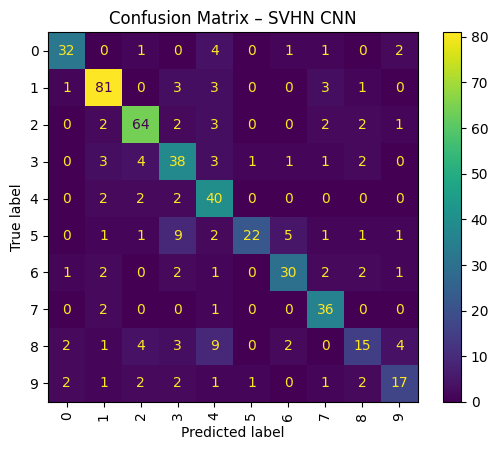

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Get predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation="vertical")
plt.title("Confusion Matrix - SVHN CNN")
plt.show()

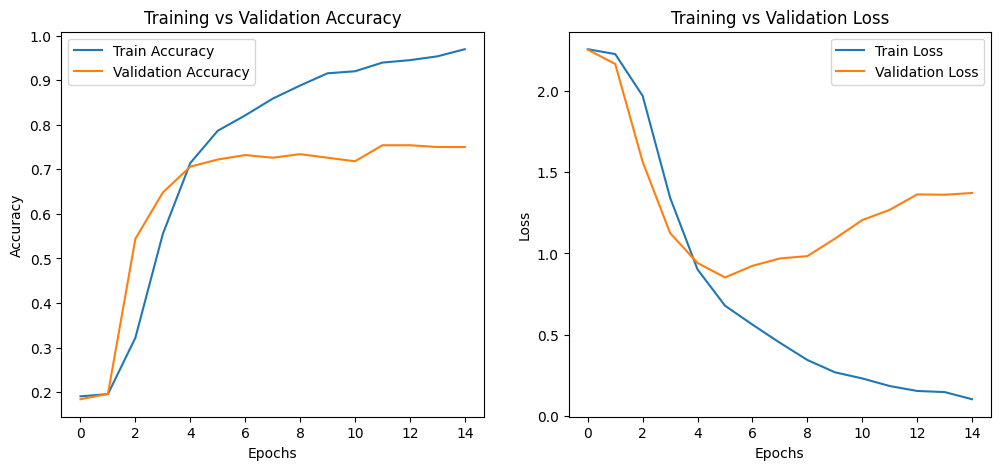

In [ ]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

plt.show()